***Задача состоит в том, чтобы распознавать мошеннические транзакции по кредитным картам, чтобы с клиентов кредитных компаний не взимались платежи за товары, которые они не приобретали.***

### Импорт всех необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix

#### Загрузка данных

In [2]:
df = pd.read_csv('creditcard.csv.crdownload')

#### EDA - Исследовательских анализ данных

In [5]:
# Функция для автоматизация анализа данных
def analyze_dataframe(df):
    print('Первых 5 строк данных:')
    display(df.head())
    
    print('Размер данных (количество строк и столбцов):')
    display(df.shape)
    
    print('Описание данных:')
    display(df.describe())
    
    print('Количетво дублирующихся строк:')
    display(df.duplicated().sum())
    
    print('Количество пропущенных значений в каждом столбце:')
    display(df.isnull().sum())
    
analyze_dataframe(df)

Первых 5 строк данных:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Размер данных (количество строк и столбцов):


(284807, 31)

Описание данных:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Количетво дублирующихся строк:


1081

Количество пропущенных значений в каждом столбце:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transcations: {}'.format(len(df[df['Class'] == 0])))

0.0016698852262818046
Fraud Cases: 473
Valid Transcations: 283253


-  Только 0.16% мошенических транзакций из всех транзакций. Данные сильно несбалансированы. Давайте сначала применим наши модели без балансировки, и если мы не получим хорошей точности, то мы сможем найти способ сбалансировать этот набор данных. Но сначала давайте реализуем модель без нее и бедем балансировать даныые только при необходимости.

In [9]:
print('Сумма мошеннической транзакции')
fraud.Amount.describe()

Сумма мошеннической транзакции


count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
print('Дейстительной транзакции')
valid.Amount.describe()

Дейстительной транзакции


count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

- Как мы можем заметить из этого, средняя сумма транзакции деньги для мошеннических больше на действительной транзакции 88.41 и на мошеническом 123.87. Это делает эту проблему критически важной для решения

### Построение корреляционной матрицы

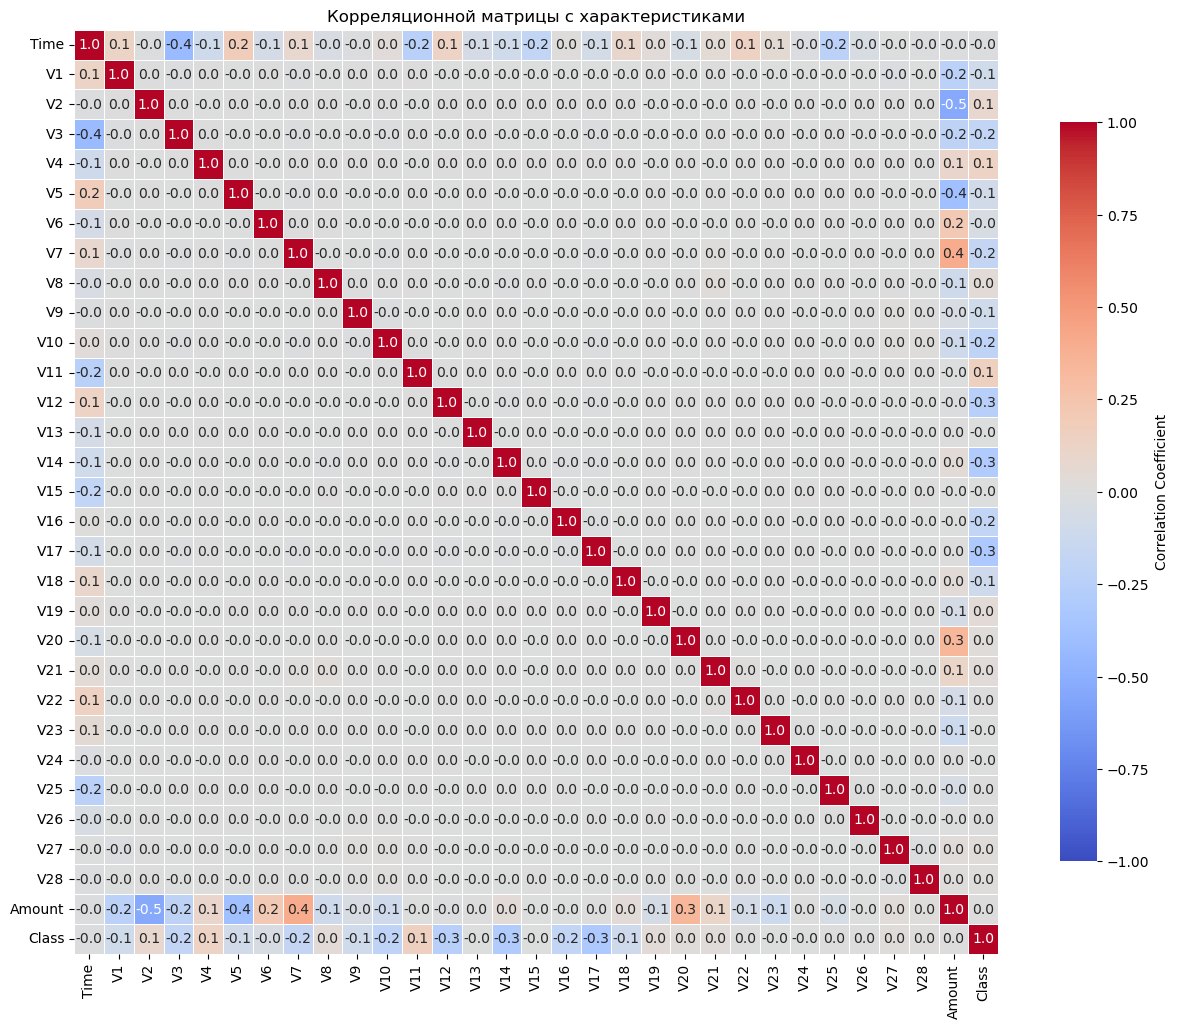

In [16]:
corrmat = df.corr()
fig = plt.figure(figsize = (16, 12))
sns.heatmap(
    corrmat, 
    annot=True,  # Добавляет значения корреляции
    fmt=".1f",   # Формат значений (2 знака после запятой)
    cmap="coolwarm",  # Цветовая палитра
    vmax=1.0,    # Максимальное значение
    vmin=-1.0,   # Минимальное значение
    square=True, # Квадратные ячейки
    linewidths=0.5, # Толщина линий между ячейками
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}  # Настройка цветовой шкалы
)
plt.title('Корреляционной матрицы с характеристиками')
plt.show()

In [17]:
corrmat_with_target = corrmat['Class'].sort_values(ascending = False)
important_features = corrmat_with_target[1:]
important_features

V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

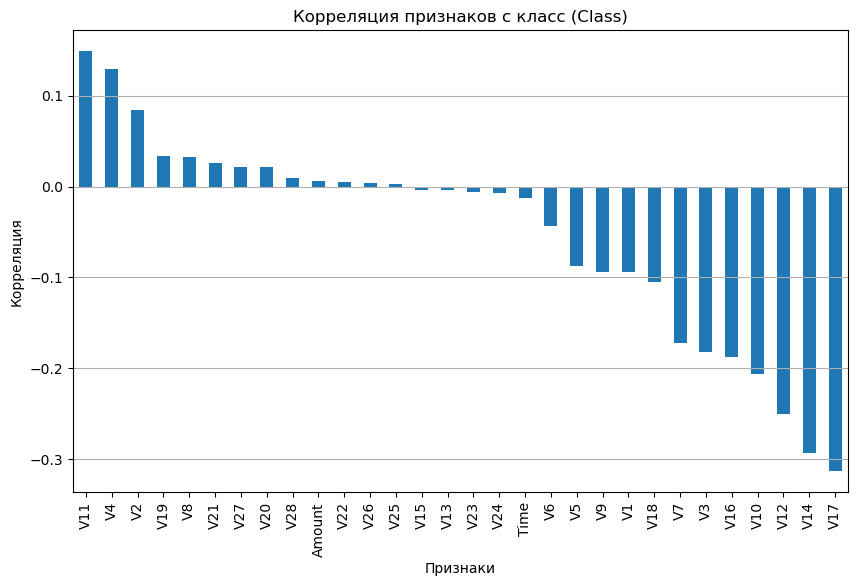

In [18]:
# Визуализация наиболее значимых признакоов
plt.figure(figsize = (10, 6))
important_features.plot(kind = 'bar')
plt.title('Корреляция признаков с класс (Class)')
plt.xlabel('Признаки')
plt.ylabel('Корреляция')
plt.grid(axis = 'y')
plt.show()

### Создания модел

In [25]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(212794, 30)
(70932, 30)
(212794,)
(70932,)


In [26]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# предсказания
y_pred = rf_model.predict(X_test)

### Создание всех видов оценичных параметров

In [27]:
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("Используемвя модель - Random Forest Classifier")

acc = accuracy_score(y_test, y_pred)
print('Точность равна {}'.format(acc))

prec = precision_score(y_test, y_pred)
print('Точность равна {}'.format(prec))

rec = recall_score(y_test, y_pred)
print('Отзыв равен {}'.format(rec))

f1 = f1_score(y_test, y_pred)
print('Оценка f1 равна {}'.format(f1))

Используемвя модель - Random Forest Classifier
Точность равна 0.9995206676817233
Точность равна 0.9534883720930233
Отзыв равен 0.7321428571428571
Оценка f1 равна 0.8282828282828283


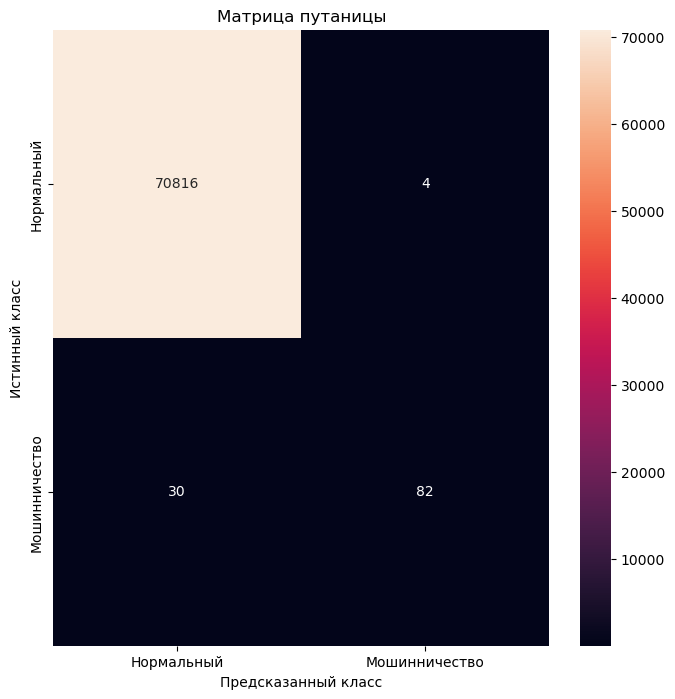

In [41]:
LABELS = ['Нормальный', 'Мошинничество']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title('Матрица путаницы')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

In [40]:
pd.DataFrame({'Оригинальный класс': y_test, 'Предсказанный класс': y_pred})

,Оригинальный класс,Предсказанный класс
104697,0,0
134356,0,0
42637,0,0
882,0,0
263275,0,0
...,...,...
255445,0,0
250918,0,0
26888,0,0
236159,0,0


- C помощью нашей модели случайного леса мы получаем лучший результат даже для отзыва, который является самой сложной частьюю